<a href="https://colab.research.google.com/github/playeredlc/treinamento-h2ia/blob/master/praticas_numpy_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

# Numpy

## Arrays

**Termos utilizados:**

*Rank* - Número de dimensões do array.

*Shape* - Tupla de inteiros que representa o tamanho do array em cada dimensão.

### Criação e acesso

In [2]:
# np.array pode ser criado a partir de uma list (tipo de dado nativo do python)
rank1_arr = np.array([1, 2, 3])
# no caso de mais dimensões cada elemento da list é uma list.
rank2_arr = np.array([[1, 2, 3], [4, 5 ,6]])

print(f'Rank 1 array. Shape: {rank1_arr.shape}.')
print(rank1_arr)

print(f'\nRank 2 array. Shape: {rank2_arr.shape}.')
print(rank2_arr)

# acesso e modificação de elemento específico
print('\nAcesso ao elemento lin: 1, col: 2:')
print(rank2_arr[1, 2])

print('Atribuição de novo valor:')
rank2_arr[1, 2] = 0
print(rank2_arr[1, 2])

print(f'\nRank 2 array:')
print(rank2_arr)


Rank 1 array. Shape: (3,).
[1 2 3]

Rank 2 array. Shape: (2, 3).
[[1 2 3]
 [4 5 6]]

Acesso ao elemento lin: 1, col: 2:
6
Atribuição de novo valor:
0

Rank 2 array:
[[1 2 3]
 [4 5 0]]


### Métodos de inicialização

In [3]:
# diferentes métodos de inicialização de numpy.arrays

# array preenchido com 0 em todas as posições
arr = np.zeros((2, 3))
print(f'Zeros:\n{arr}\n')

# array preenchido com 1 em todas as posições
arr = np.ones((2, 3))
print(f'Ones:\n{arr}\n')

# array preenchido com uma constante
arr = np.full((2, 3), 1.23)
print(f'Full (constante):\n{arr}\n')

# array preenchido com valores aleatórios (0 - 1)
arr = np.random.random((2, 3))
print(f'Random:\n{arr}\n')

# matriz identidade de nxn dimensões
n = 3
arr = np.eye(n)
print(f'Eye (matriz identidade):\n{arr}')

Zeros:
[[0. 0. 0.]
 [0. 0. 0.]]

Ones:
[[1. 1. 1.]
 [1. 1. 1.]]

Full (constante):
[[1.23 1.23 1.23]
 [1.23 1.23 1.23]]

Random:
[[0.03796554 0.83372392 0.29465199]
 [0.84107682 0.75015206 0.30324677]]

Eye (matriz identidade):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Indexação

#### Slicing

Utilizar slicing permite indexar um sub-array do array original, definindo um intervalo específico de linhas e colunas a ser indexado.

In [4]:
# SLICING

arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [13, 14, 15, 16]])
print('Array original')
print(arr, '\n')


print('2 primeiras linhas e 3 primeiras colunas')
print(arr[:2, :3], '\n')

print('indexar a partir da segunda linha e segunda coluna (ignorando a primeira)')
print(arr[1:, 1:], '\n')

print('ignorar primeiras e últimas colunas.')
print(arr[1:arr.shape[0]-1, 1:arr.shape[1]-1], '\n')

print('modificações afetam o array original')
arr[1:arr.shape[0]-1, 1:arr.shape[1]-1] = 0

print(arr, '\n')

Array original
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]] 

2 primeiras linhas e 3 primeiras colunas
[[1 2 3]
 [5 6 7]] 

indexar a partir da segunda linha e segunda coluna (ignorando a primeira)
[[ 6  7  8]
 [10 11 12]
 [14 15 16]] 

ignorar primeiras e últimas colunas.
[[ 6  7]
 [10 11]] 

modificações afetam o array original
[[ 1  2  3  4]
 [ 5  0  0  8]
 [ 9  0  0 12]
 [13 14 15 16]] 



#### Utilizando inteiros

Utilizando inteiros para fazer a indexação, é possível selecionar elementos arbitrários do array original a serem utilizados na construção de outros.


In [5]:
# UTILIZANDO INTEIROS

arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [13, 14, 15, 16]])
print('Array original')
print(arr, '\n')

# os elementos com mesmo índice nas 2 duas listas representam os valores para linha e coluna
print('acessando os elementos da diagonal principal:')
print(arr[[0,1,2,3], [0,1,2,3]], '\n')

# é possível 'filtrar' um elemento de cada linha utilizando uma lista de indices
index_list = [0, 1, 2, 3]
print('acessando diagonal principal com lista de indices:')
print(arr[np.arange(4), index_list], '\n')

# da mesma forma é possível modificar os elementos
arr[np.arange(4), index_list] = 0
print('zerando a diagonal principal:')
print(arr, '\n')


Array original
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]] 

acessando os elementos da diagonal principal:
[ 1  6 11 16] 

acessando diagonal principal com lista de indices:
[ 1  6 11 16] 

zerando a diagonal principal:
[[ 0  2  3  4]
 [ 5  0  7  8]
 [ 9 10  0 12]
 [13 14 15  0]] 



#### Utilizando booleanos

O uso de booleanos permite indexar elementos arbitrários do array que satisfaçam uma determinada condição lógica.

In [6]:
# UTILIZANDO BOOLEAN

arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [13, 14, 15, 16]])
print('Array original')
print(arr, '\n')

print('elementos > 5 recebem o valor True')
print(arr > 5, '\n')

print('elementos pares recebem o valor True:')
print(arr%2 == 0, '\n')

print('utilizando o array resultante obter os valores reais:')
print(arr[arr%2==0], '\n')


Array original
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]] 

elementos > 5 recebem o valor True
[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]] 

elementos pares recebem o valor True:
[[False  True False  True]
 [False  True False  True]
 [False  True False  True]
 [False  True False  True]] 

utilizando o array resultante obter os valores reais:
[ 2  4  6  8 10 12 14 16] 



### Operações Matemáticas

As operações matemáticas realizadas nos arrays são feitas elemento a elemento e podem ser utilizadas por meio dos operadores convencionais (existe sobrecarga de operadores) ou utilizando os métodos disponíveis para objetos do tipo array. O módulo do numpy também implementa diversas operações úteis como funções, uma delas é a função *sum()* vista abaixo.


In [7]:
# função sum() do módulo numpy

arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [13, 14, 15, 16]])
print('Array original')
print(arr, '\n')

print('Soma de todos os elementos do array:')
print(np.sum(arr), '\n')

print('Soma de todos os elementos POR LINHA:')
print(np.sum(arr, axis=1), '\n')

print('Soma de todos os elementos POR COLUNA:')
print(np.sum(arr, axis=0), '\n')

Array original
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]] 

Soma de todos os elementos do array:
136 

Soma de todos os elementos POR LINHA:
[10 26 42 58] 

Soma de todos os elementos POR COLUNA:
[28 32 36 40] 



In [8]:
# multiplicação de matrizes

arr = np.array([[1,2], [3,4]])
print('Array original')
print(arr, '\n')

print('Multiplicação elemento a elemento')
print(arr * arr, '\n')
# ou
print(np.multiply(arr, arr), '\n')

# para realizar o produto de matrizes de fato utiliza-se o método dot(print(arr.dot(arr), '\n')
print(arr.dot(arr), '\n')
# ou
print(np.dot(arr, arr), '\n')

Array original
[[1 2]
 [3 4]] 

Multiplicação elemento a elemento
[[ 1  4]
 [ 9 16]] 

[[ 1  4]
 [ 9 16]] 

[[ 7 10]
 [15 22]] 

[[ 7 10]
 [15 22]] 



### Broadcasting

Esse termo diz respeito a forma com que o numpy realiza operações elemento a elemento quando os arrays envolvidos não possuem o mesmo shape.

Esse mecanismo permite que essas operações com matrizes sejam vetorizadas e sejam executadas em C ao invés de Python, gerando um ganho de performance. A forma com que é implementado também garante que não haja uso desnecessário de memória com dados redundantes, caso os shapes dos arrays envolvidos atendam a algumas regras de compatibilidade.

In [9]:
# exemplo de soma elemento a elemento onde os arrays são compatíveis

bigger_arr = np.array([[0, 0, 0],
                         [10, 10, 10],
                         [20, 20, 20],
                         [30, 30, 30]])
print(f'Array maior. Shape: {bigger_arr.shape}')
print(bigger_arr, '\n')

smaller_arr = np.array([1, 2, 3])
print(f'Array menor. Shape: {smaller_arr.shape}')
print(smaller_arr, '\n')

# a soma ocorre normalmente
print('bigger + smaller:')
print(bigger_arr + smaller_arr, '\n')


print('---')
# exemplo de array incompatível
smaller_arr_incomp = np.array([1,2,3,4])

print(f'Array menor incompatível. Shape: {smaller_arr_incomp.shape}', '\n')

print('bigger + smaller (incompatibles):', '\n')
try:
  print(bigger_arr + smaller_arr_incomp)
except Exception as e:
  print('Ocorreu um erro:')
  print(e)


Array maior. Shape: (4, 3)
[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

Array menor. Shape: (3,)
[1 2 3] 

bigger + smaller:
[[ 1  2  3]
 [11 12 13]
 [21 22 23]
 [31 32 33]] 

---
Array menor incompatível. Shape: (4,) 

bigger + smaller (incompatibles): 

Ocorreu um erro:
operands could not be broadcast together with shapes (4,3) (4,) 


# Matplotlib

Matplotlib é uma biblioteca de uso geral para criação de gráfico e visualização de dados, geralmente utilizada por meio de sua interface *pyplot*.

In [10]:
# configurações inicias: tamanho da figura, estilo do background
plt.style.use('dark_background')
rcParams['figure.figsize']=(16,8)

## 2D

### Plot da função $f(x) = sen(x)$

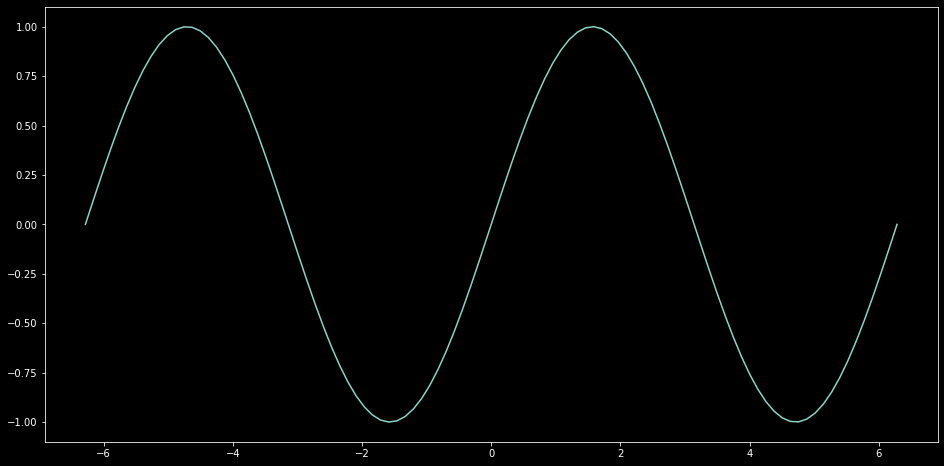

In [11]:
# plot da função seno sem nenhuma configuração da figura

x = np.linspace(-np.pi*2, np.pi*2, 100) # amostra do domínio
fx = np.sin(x)

# plot a curva da função
plt.plot(x, fx)

plt.show()

### Adicionar título, legendas e grid

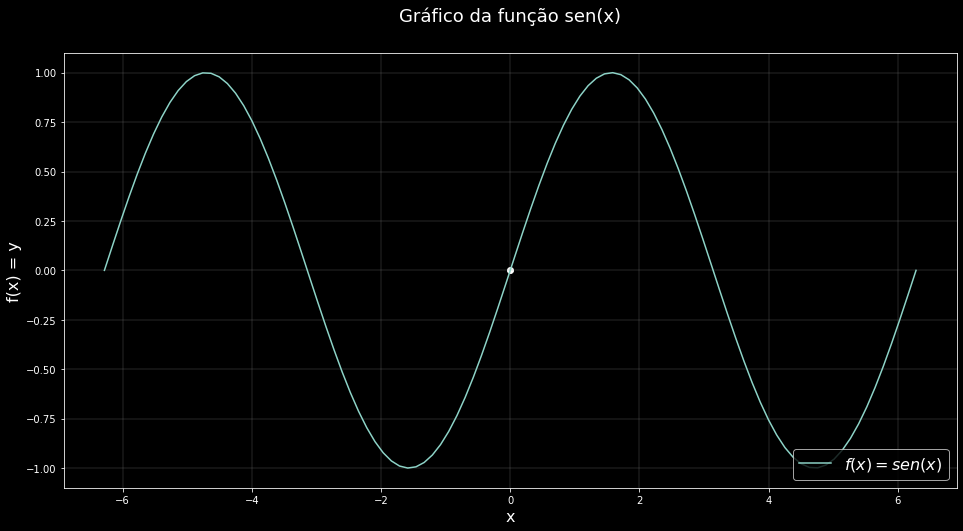

In [12]:
# titulo
plt.title("Gráfico da função sen(x)", fontsize=18, pad=32)

# adicionar labels aos eixos
plt.xlabel(r'x', fontsize=16)
plt.ylabel(r'f(x) = y', fontsize=16)

# adiciona o grid e ponto na origem
plt.grid(c='grey', linewidth=0.3)
plt.scatter(0, 0, color='white')

# plota a curva
plt.plot(x, fx)

# adiciona legenda da curva
plt.legend([r'$f(x)=sen(x)$'], loc='lower right', fontsize=16)

plt.show()

### Ajustar tamanho e cores

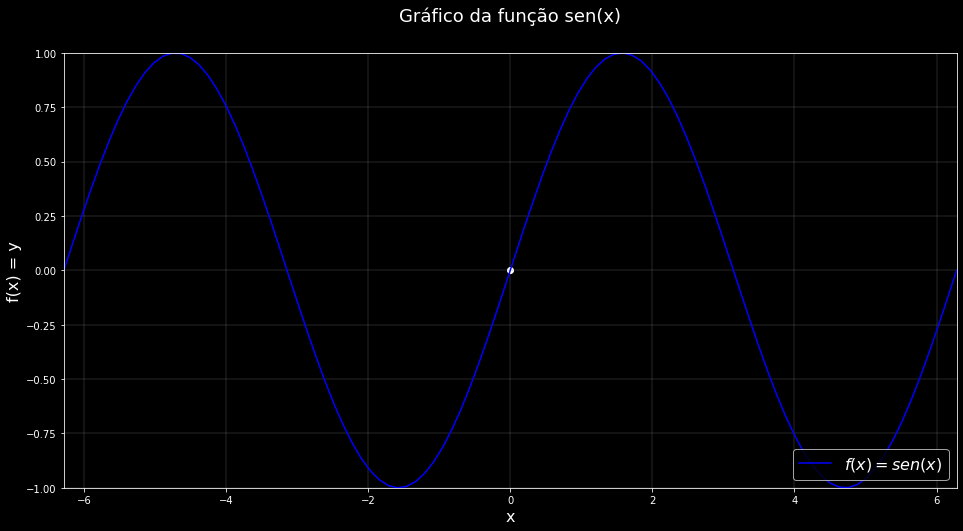

In [13]:
# gráfico da célula anterior
plt.title("Gráfico da função sen(x)", fontsize=18, pad=32)
plt.xlabel(r'x', fontsize=16)
plt.ylabel(r'f(x) = y', fontsize=16)
plt.grid(c='grey', linewidth=0.3)
plt.scatter(0, 0, color='white')

# ajustar tamanho dos eixos x e y
plt.xlim(-np.pi*2, np.pi*2)
plt.ylim(-1, 1)

# modificar a cor da curva
plt.plot(x, fx, c='blue')
plt.legend([r'$f(x)=sen(x)$'], loc='lower right', fontsize=16)

plt.show()

### Plotar segunda função $g(x) = cos(x)$

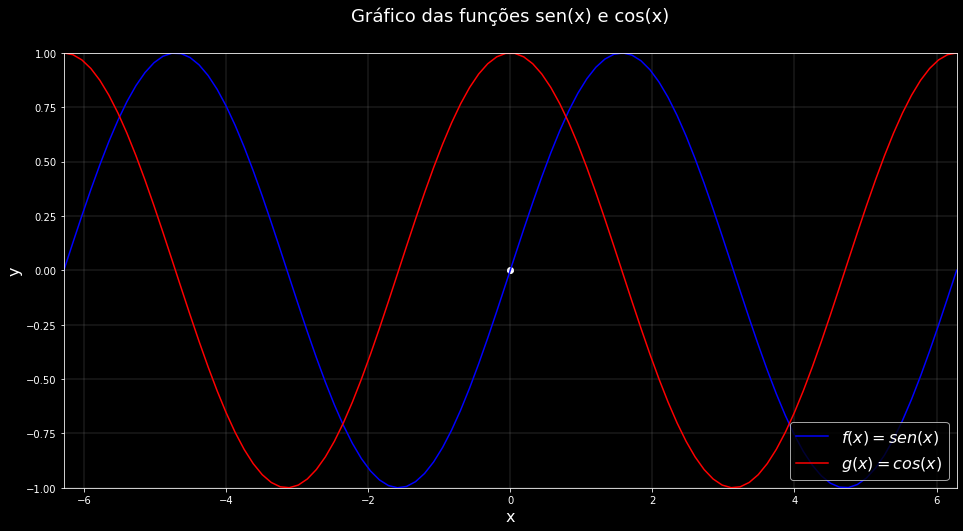

In [14]:
# gráfico anterior
plt.title("Gráfico das funções sen(x) e cos(x)", fontsize=18, pad=32)
plt.xlabel(r'x', fontsize=16)
plt.ylabel(r'y', fontsize=16)
plt.grid(c='grey', linewidth=0.3)
plt.scatter(0, 0, color='white')
plt.xlim(-np.pi*2, np.pi*2)
plt.ylim(-1, 1)

# plota fx
plt.plot(x, fx, c='blue')

# definir g(x)
gx = np.cos(x)

# plota gx e ajusta legenda
plt.plot(x, gx, c='red')
plt.legend([r'$f(x)=sen(x)$', r'$g(x)=cos(x)$'], loc='lower right', fontsize=16)

plt.show()

### Subplots
Utilizado para plotar diversos gráficos na mesma figura.

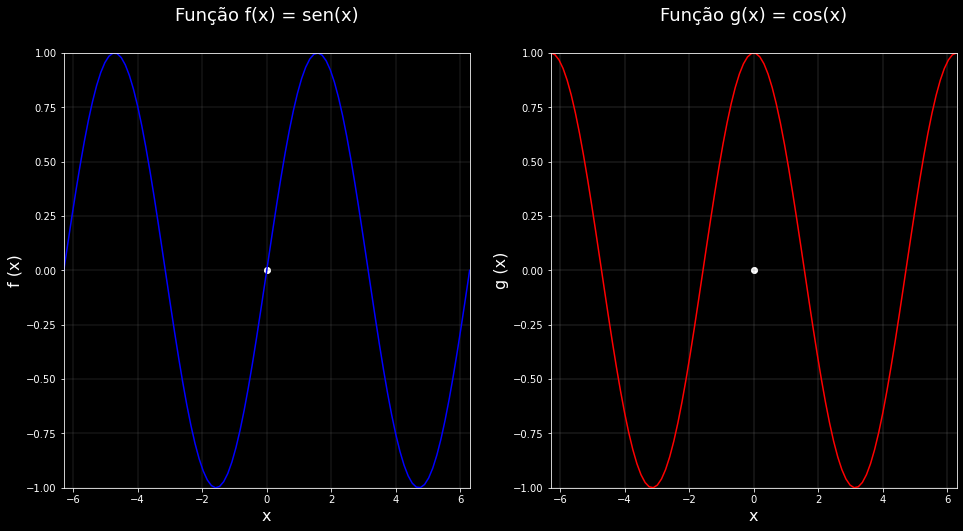

In [15]:
# PLOT 1

# argumentos de subplot: (num de linhas, num de colunas, índice do gráfico)
plt.subplot(1, 2, 1).set_title('Função f(x) = sen(x)', fontsize=18, pad=32)

plt.xlim(-np.pi*2, np.pi*2)
plt.ylim(-1, 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('f (x)', fontsize=16)
plt.grid(c='dimgrey', linewidth=0.3)
plt.scatter(0, 0, c='white')
# plota a curva de f(x)
plt.plot(x, fx, c='blue')

# PLOT 2

plt.subplot(1, 2, 2).set_title('Função g(x) = cos(x)', fontsize=18, pad=32)
plt.xlim(-np.pi*2, np.pi*2)
plt.ylim(-1, 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('g (x)', fontsize=16)
plt.grid(c='grey', linewidth=0.3)
plt.scatter(0, 0, c='white')
# plota a curva de f(x)
plt.plot(x, gx, c='red')

plt.show()

## 3D

### Inicialização do gráfico

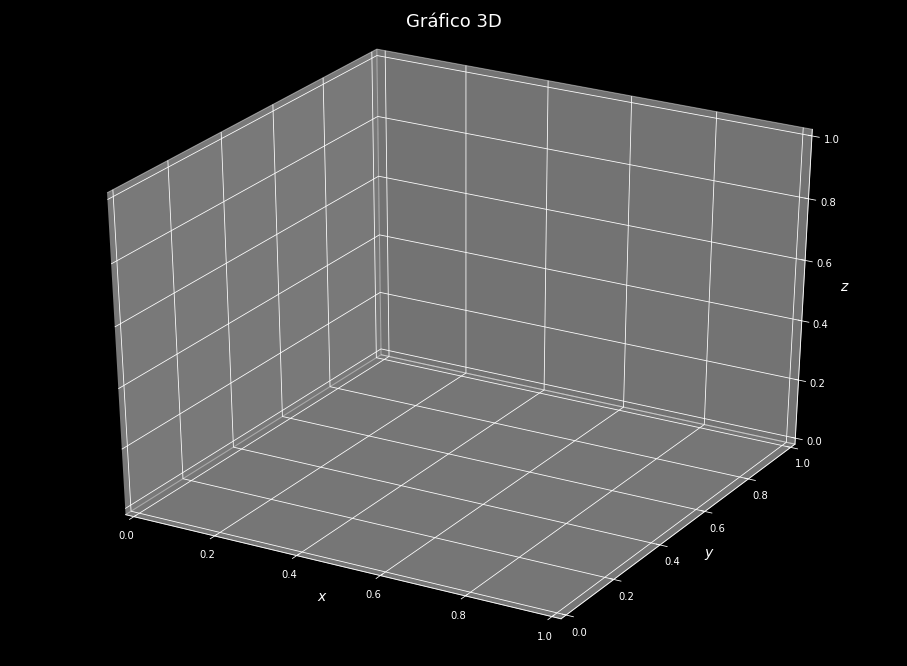

In [16]:
# configurações básicas

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d') # primeiro argumento é (num. lin, num. col, índ. gráfico)

# adiciona legendas e título
ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$y$', fontsize=14)
ax.set_zlabel(r'$z$', fontsize=14)
ax.set_title('Gráfico 3D', fontsize=18, pad=32)

plt.show()

### Plotar curva

*Exemplo retirado da documentação oficial https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html#d-plots-in-3d*

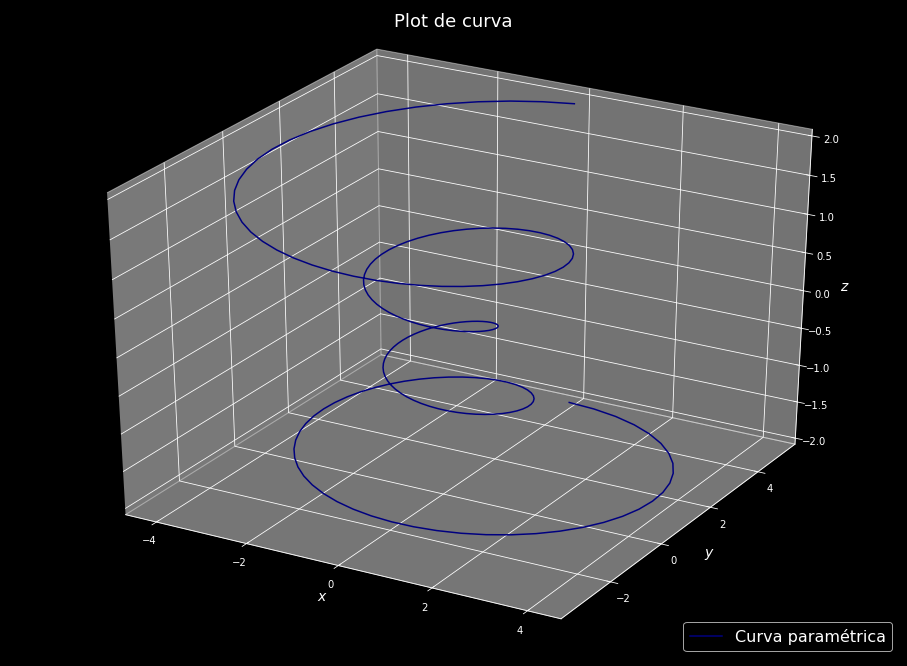

In [17]:
# configurações básicas
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d') # primeiro argumento é (num. lin, num. col, índ. gráfico)
ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$y$', fontsize=14)
ax.set_zlabel(r'$z$', fontsize=14)
ax.set_title('Plot de curva', fontsize=18, pad=32)

# 
theta = np.linspace(-4 * np.pi, 4 * np.pi, 200)
z = np.linspace(-2, 2, 200)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, c='navy', label='Curva paramétrica')
ax.legend(loc='lower right', fontsize=16)

plt.show()

### Plotar superfície

Para plotar uma superfície são necessários arrays de duas dimensões contendo as coordenadas de x, y e um array contendo a informação referente ao eixo z da superfície.

A função que será plotada é definida como:

$ϕ(x,y)=sen²(πxy) cos(2πy²), x ∈ [0,1], y ∈ [0,1]$

*referência: https://buildmedia.readthedocs.org/media/pdf/maths-with-python/latest/maths-with-python.pdf (pg.73)*

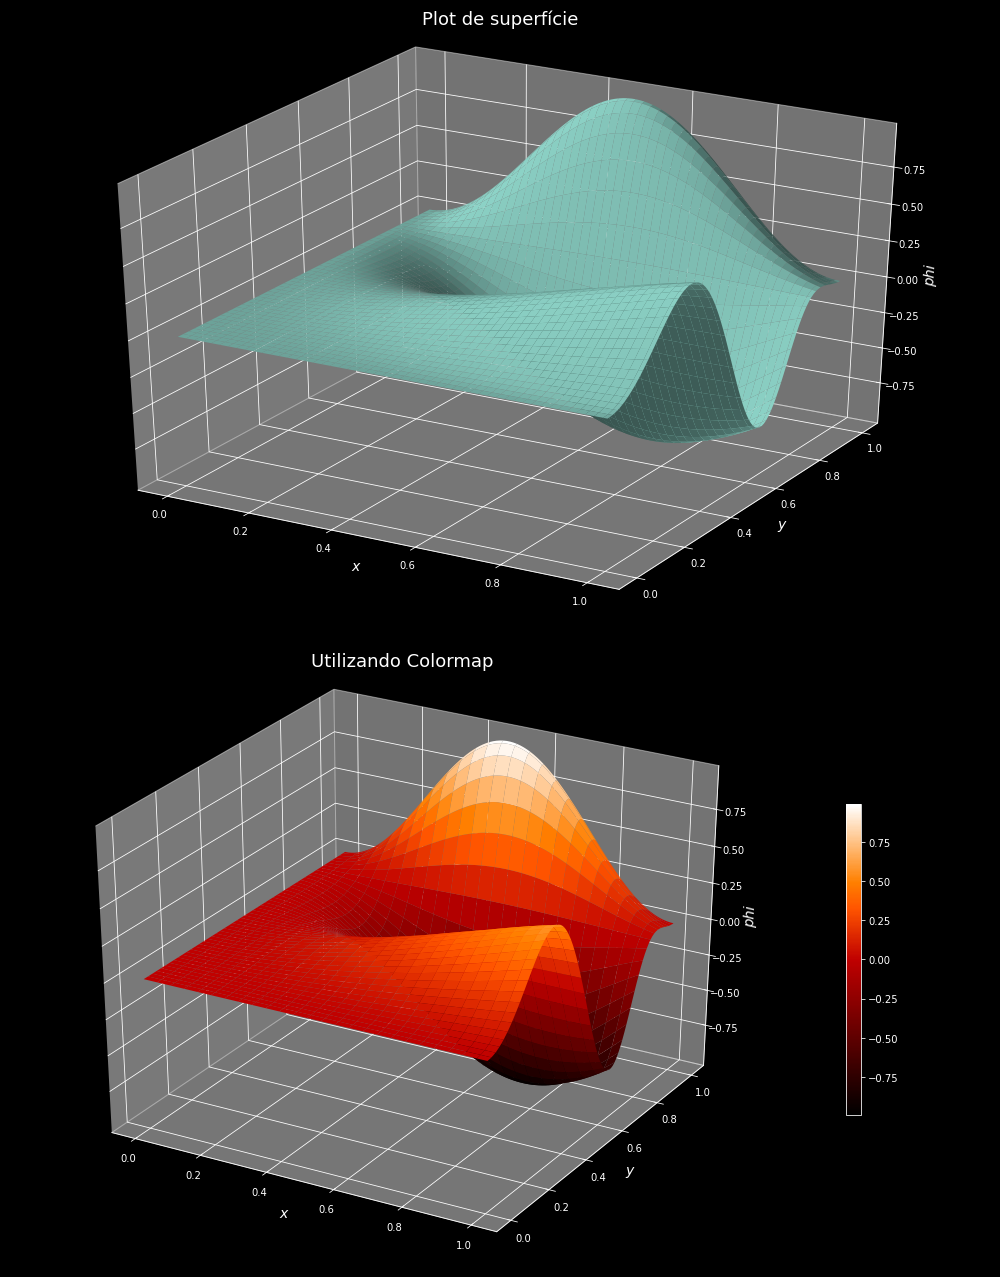

In [18]:
# configurações básicas
fig = plt.figure(figsize=(14, 18))

# PLOT 1
ax = fig.add_subplot(211, projection='3d')
ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$y$', fontsize=14)
ax.set_zlabel(r'$phi$', fontsize=14)
ax.set_title('Plot de superfície', fontsize=18, pad=32)

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y) # arrays contendo as coordenadas
# definição da função
phi = np.sin(np.pi * X * Y)**2 * np.cos(2 * np.pi * Y**2)
# plotar a superfície
ax.plot_surface(X, Y, phi)


# PLOT 2
ax = fig.add_subplot(212, projection='3d')
ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$y$', fontsize=14)
ax.set_zlabel(r'$phi$', fontsize=14)
ax.set_title('Utilizando Colormap', fontsize=18, pad=32)

# melhorar a aparência da superficie com colormap
# https://matplotlib.org/stable/api/cm_api.html
p = ax.plot_surface(X, Y, phi, rstride=2, cstride=4, cmap=cm.gist_heat)
fig.colorbar(p, shrink=0.5)

plt.tight_layout()
plt.show()